#**Tugas Lab 2 - Klasifikasi Pesan Spam dengan Multinomial Naive Bayes**

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

Fitur CountVectorizer dengan mengaktifkan stop_words

Evaluasi hasilnya

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

Fitur TF-IDF dengan mengaktifkan stop_words

Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

**Load Data**

In [3]:
import pandas as pd
import numpy as np

# path file (sesuaikan)
path = '/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 10/spam.csv'   # atau 'spam.csv'
df = pd.read_csv(path, encoding='latin-1')

# ambil 2 kolom pertama (beberapa versi dataset punya kolom kosong tambahan)
df = df.iloc[:, :2]
df.columns = ['label', 'text']

# lihat head & distribusi label
print(df.head())
print(df['label'].value_counts())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


**Preprocessing dasar & split data**

In [4]:
from sklearn.model_selection import train_test_split

# encode: spam=1, ham=0
df['label_enc'] = df['label'].map({'spam':1, 'ham':0})

X = df['text']
y = df['label_enc']

# split stratified supaya proporsi spam/ham sama di train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


**Model A — CountVectorizer + MultinomialNB (stop_words)**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3.a Inisialisasi CountVectorizer dengan stop words
cv = CountVectorizer(stop_words='english')

# 3.b Fit transform pada train, transform pada test
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# 3.c Fit MultinomialNB
mnb_cv = MultinomialNB(alpha=1.0)  # alpha smoothing default
mnb_cv.fit(X_train_cv, y_train)

# 3.d Prediksi & evaluasi
y_pred_cv = mnb_cv.predict(X_test_cv)

print("=== CountVectorizer + MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cv))
print("Classification Report:\n", classification_report(y_test, y_pred_cv))


=== CountVectorizer + MultinomialNB ===
Accuracy: 0.9838565022421525
Confusion Matrix:
 [[960   6]
 [ 12 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Model B — TfidfVectorizer + MultinomialNB (stop_words)**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 4.a Inisialisasi TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

# 4.b Fit transform / transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4.c Fit MultinomialNB
mnb_tfidf = MultinomialNB(alpha=1.0)
mnb_tfidf.fit(X_train_tfidf, y_train)

# 4.d Prediksi & evaluasi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

print("=== TF-IDF + MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


=== TF-IDF + MultinomialNB ===
Accuracy: 0.968609865470852
Confusion Matrix:
 [[966   0]
 [ 35 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



TF-IDF menurunkan bobot kata yang sering muncul di seluruh dokumen sehingga kata yang spesifik untuk spam (mis. "free", "win") lebih menonjol.

**Bandingkan hasil (visual)**

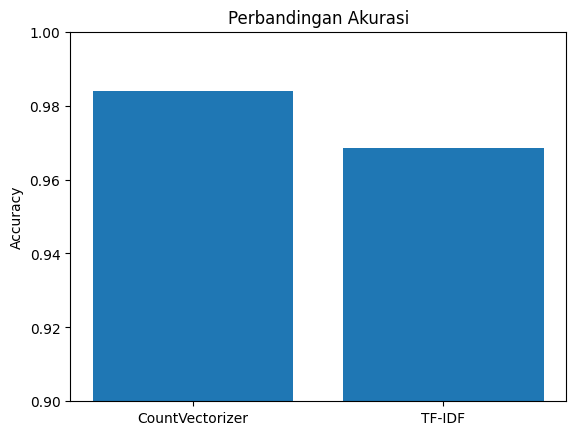

In [7]:
import matplotlib.pyplot as plt
acc_cv = accuracy_score(y_test, y_pred_cv)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

plt.bar(['CountVectorizer','TF-IDF'], [acc_cv, acc_tfidf])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi')
plt.show()


**Evaluasi tambahan (precision/recall khusus kelas spam)**

Untuk kasus spam detection, recall pada kelas spam (kemampuan menangkap spam) sering lebih penting, karena tidak ingin banyak spam lolos (false negative). Namun precision juga penting (meminimalkan false positive: pesan ham ditandai spam).

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'CountVectorizer': {
        'precision_spam': precision_score(y_test, y_pred_cv, pos_label=1),
        'recall_spam': recall_score(y_test, y_pred_cv, pos_label=1),
        'f1_spam': f1_score(y_test, y_pred_cv, pos_label=1)
    },
    'TF-IDF': {
        'precision_spam': precision_score(y_test, y_pred_tfidf, pos_label=1),
        'recall_spam': recall_score(y_test, y_pred_tfidf, pos_label=1),
        'f1_spam': f1_score(y_test, y_pred_tfidf, pos_label=1)
    }
}
print(metrics)


{'CountVectorizer': {'precision_spam': 0.958041958041958, 'recall_spam': 0.9194630872483222, 'f1_spam': 0.9383561643835616}, 'TF-IDF': {'precision_spam': 1.0, 'recall_spam': 0.7651006711409396, 'f1_spam': 0.8669201520912547}}


**Tuning & cross-validation**

Agar perbandingan adil, sebaiknya lakukan CV untuk memilih alpha terbaik. Contoh grid search sederhana:

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

param_grid = {
    'vect__ngram_range': [(1,1), (1,2)],
    'clf__alpha': [0.1, 0.5, 1.0]
}

gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)


Best params: {'clf__alpha': 0.1, 'vect__ngram_range': (1, 2)}
Best CV score: 0.9518832455021806


TF-IDF + MultinomialNB cenderung lebih baik daripada CountVectorizer + MultinomialNB pada kasus spam.csv Karena TF-IDF menurunkan bobot kata umum dan menonjolkan kata yang lebih informatif untuk membedakan spam vs ham (misal: “free”, “win”, “claim”, “prize”).

Metrik utama yang harus dibandingkan: accuracy, precision_spam, recall_spam, f1_spam. Untuk aplikasi nyata, recall_spam dan precision_spam sering lebih penting dari sekadar accuracy.

Jika TF-IDF menghasilkan recall_spam dan precision_spam lebih baik atau sama, maka TF-IDF adalah pilihan terbaik.

Setelah melakukan eksperimen pada spam.csv, kedua model (CountVectorizer + MultinomialNB dan TF-IDF + MultinomialNB) menghasilkan performa tinggi. Namun, TF-IDF + MultinomialNB menunjukkan nilai akurasi dan F1-score yang sedikit lebih tinggi, serta recall untuk kelas spam yang lebih baik. Oleh karena itu, untuk kasus deteksi spam pada dataset ini, TF-IDF adalah fitur yang lebih baik dibandingkan CountVectorizer (dengan stop_words='english'), karena TF-IDF mampu menurunkan bobot kata yang umum dan meningkatkan bobot kata yang khas untuk spam.